In [165]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [166]:
data=pd.read_csv("CarPrice_Assignment.csv")

In [167]:
data.head(5)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [168]:
data.drop(columns=['car_ID'],axis=1,inplace=True)

In [169]:
data_temp=data.copy()

In [170]:
#Basic check for missing values

data.isna().sum()

symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [171]:
#Check for each data type

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   CarName           205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

In [172]:
#check for std,mean,median,mode

data.describe().T

,count,mean,std,min,25%,50%,75%,max
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
wheelbase,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
carlength,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
carwidth,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
carheight,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curbweight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
enginesize,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
boreratio,205.0,3.329756,0.270844,2.54,3.15,3.31,3.58,3.94
stroke,205.0,3.255415,0.313597,2.07,3.11,3.29,3.41,4.17
compressionratio,205.0,10.142537,3.972040,7.00,8.60,9.00,9.40,23.00


In [173]:
#Data Cleaning


temp=data['CarName'].str.split(' ').str[0]

data.drop(columns=['CarName'],axis=1,inplace=True)

data.insert(loc=3,column='CarName',value=temp)

In [174]:
data['CarName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [175]:
# since some of the car names are same , we can replace it

def replacename(key,value):
    data['CarName'].replace({key:value},inplace=True)  

In [176]:
data['CarName'].str.lower()

replacename('mazda', 'maxda')
replacename('porcshce','porsche')
replacename('vw','volkswagen')
replacename('vokswagen','volkswagen')
replacename('toyouta','toyota')

In [177]:
data['CarName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'buick', 'mercury', 'mitsubishi',
       'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [178]:
#Visualizing target variable:

data['price'].describe(percentiles=[0,0.25,0.50,0.75,0.85,1])

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
0%        5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
85%      18500.000000
100%     45400.000000
max      45400.000000
Name: price, dtype: float64

#Inference: we could see 50% of data is within the range of 10,000 , 85% of data is within the range 18500 and rest 15% of data is between 18500 to 45400

C:\Users\a0g0btd\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


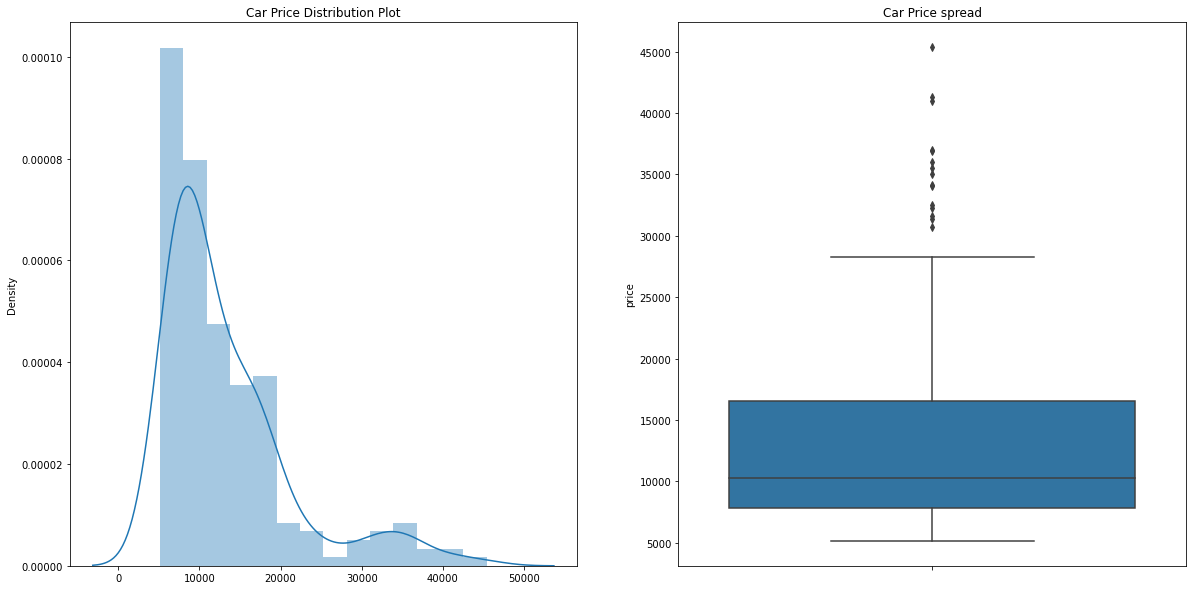

In [179]:
#Lets check the spread of target variable 'Price'

plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
sns.distplot(x=data['price'])
plt.title('Car Price Distribution Plot')

plt.subplot(1,2,2)
sns.boxplot(y=data['price'])
plt.title('Car Price spread')

plt.show()

In [180]:
#Visualizing categorical Data:
List_obj=[]
for i in data.columns:
    if data[i].dtype=='object':
        List_obj.append(i)
  

In [181]:
def visualize(x,y):
    
    plt.figure(figsize=(20,10))
    
    plt.subplot(1,2,1)
    sns.countplot(x=data[x])
    plt.title('Count of {} categories'.format(x))
    
    plt.subplot(1,2,2)
    sns.boxplot(x=data[x],y=data[y])
    plt.title('{} vs price'.format(x))
    
    plt.show()
    
    df = pd.DataFrame(data.groupby([x])[y].mean().sort_values(ascending = False))
    df.plot.bar()
    plt.title('{} vs Average Price'.format(x))
    plt.show()
                    
    
    
    

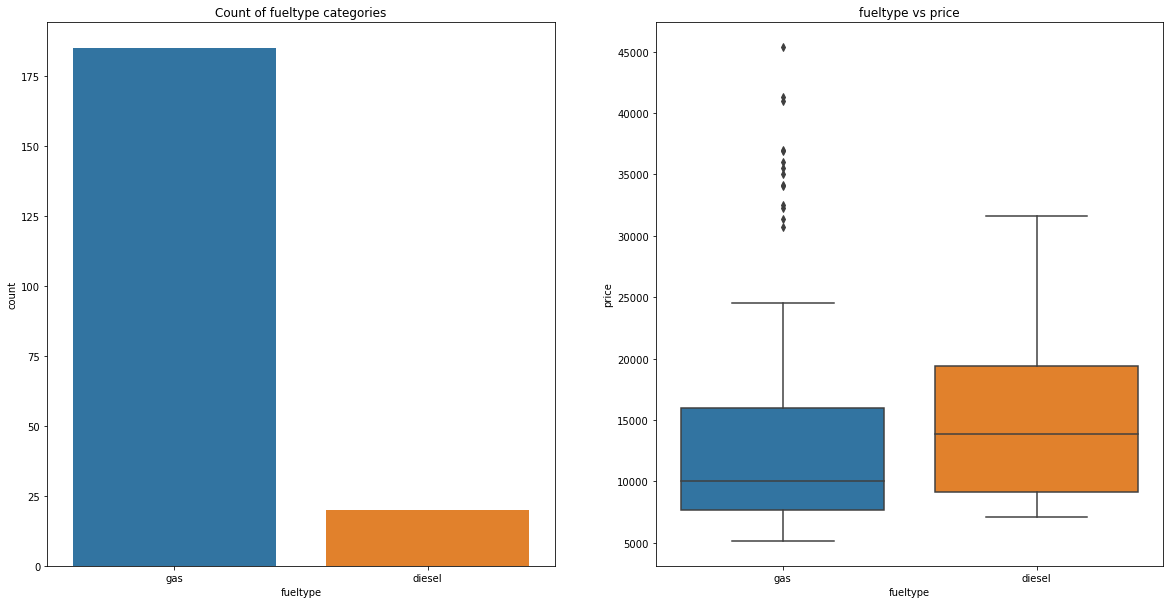

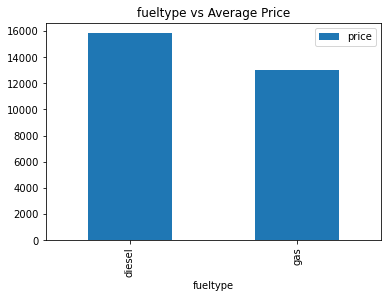

In [182]:
visualize('fueltype','price')

#Inference : Fueltype 'gas' is highly used by people and from the box plot 'gas type cars' has lowest value compared to diesel cars

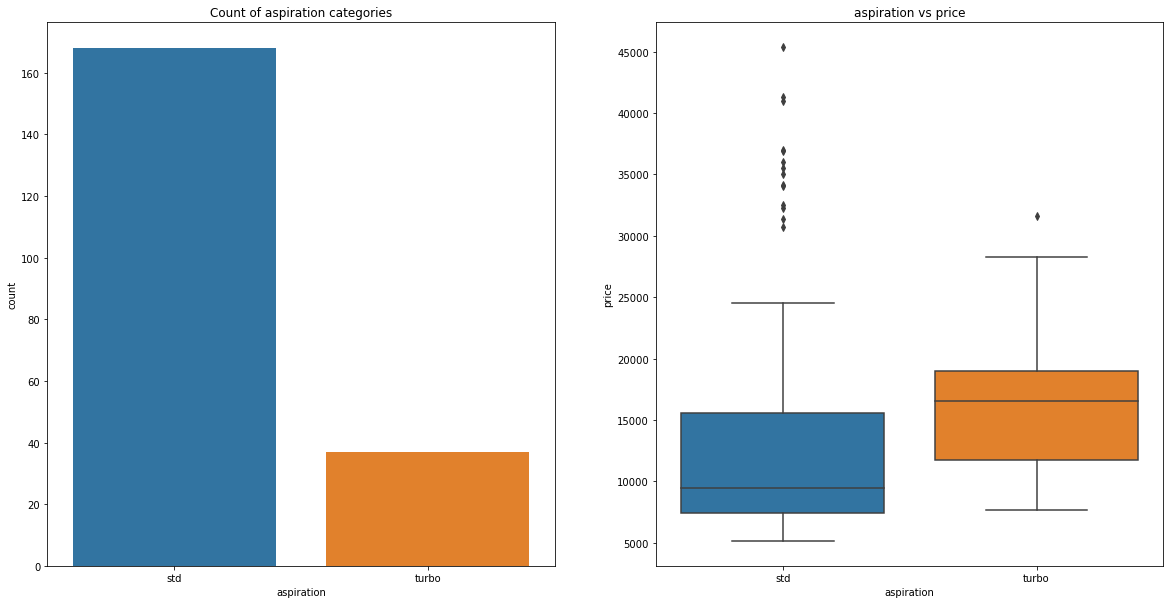

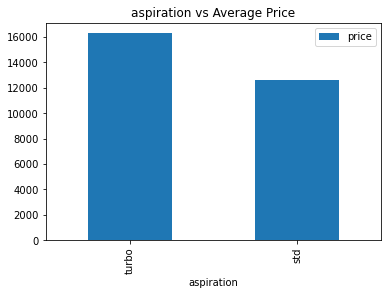

In [183]:
visualize('aspiration','price')

#Inference : standard type cars are highly used by customers and seems to have lower price than turbo cars

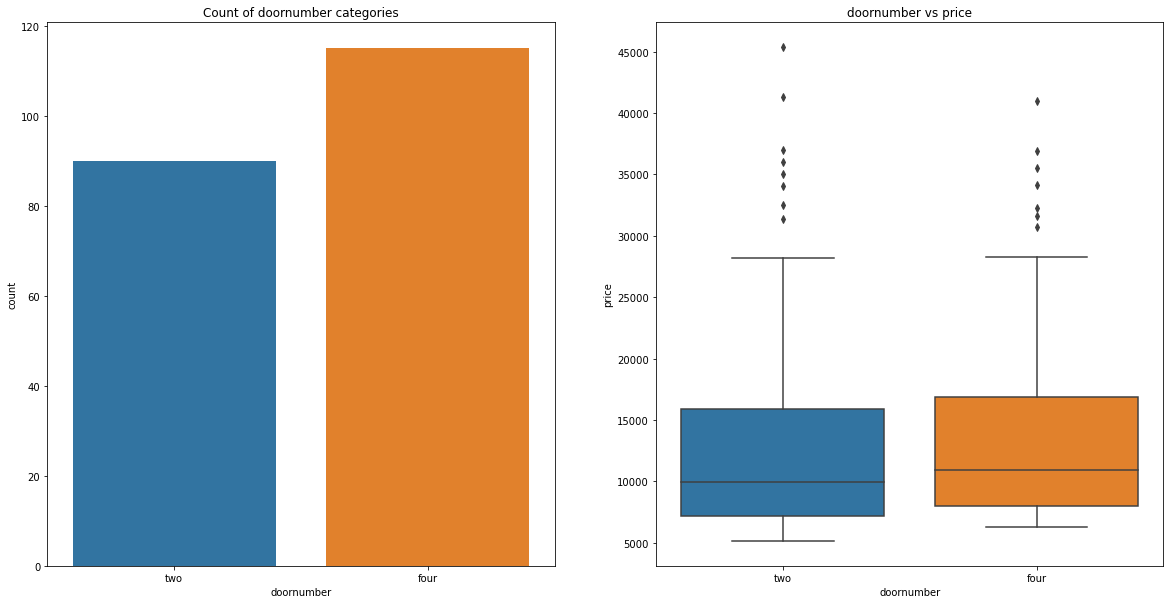

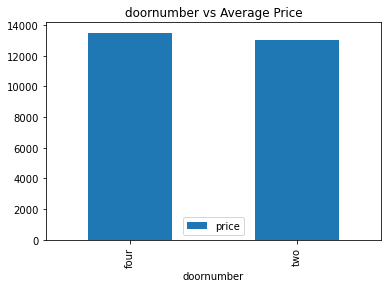

In [184]:
visualize('doornumber','price')

#Inference : 'four doors' are highly than two doors but with respect to there is no variation between two type

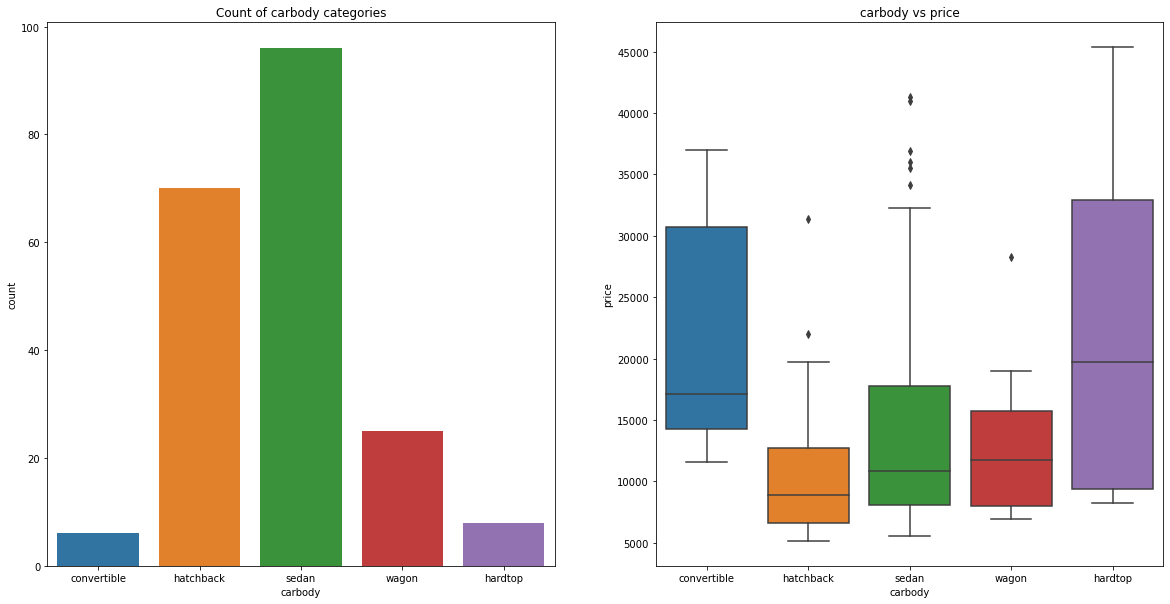

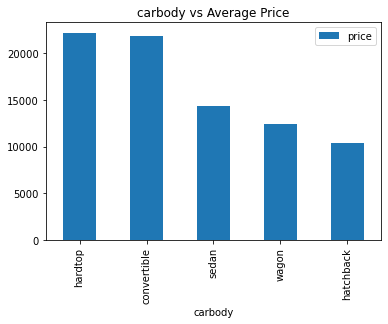

In [185]:
visualize('carbody','price')

#Inference:sedan car is highly purchased by customers and is also third most highest rated cars, wheareas convertible and hardtop is lowest purcase cars because of its market rate

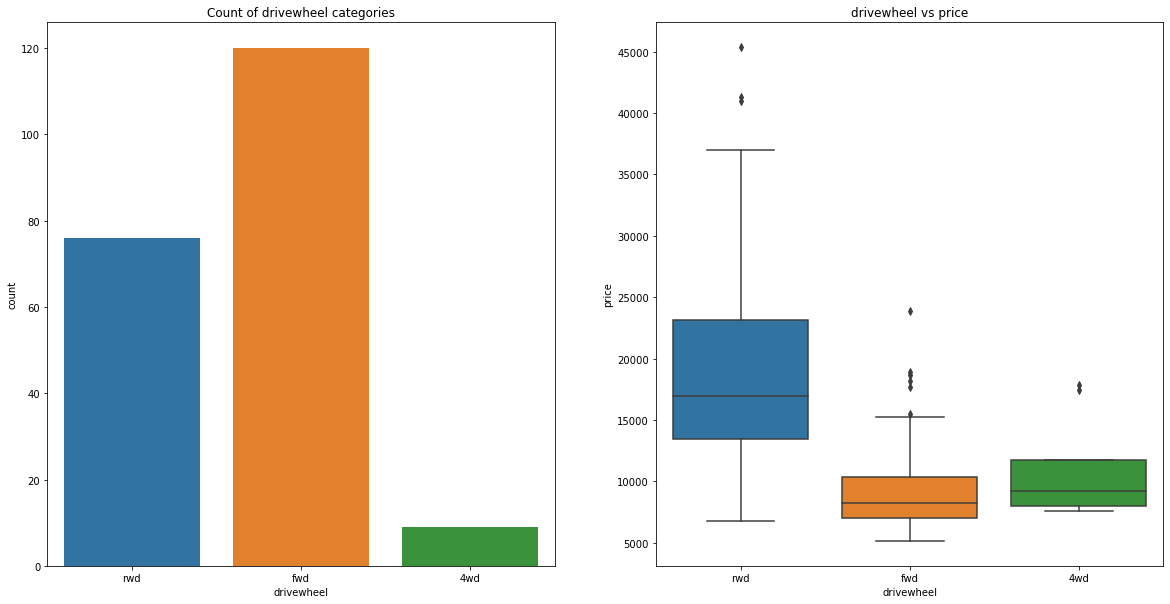

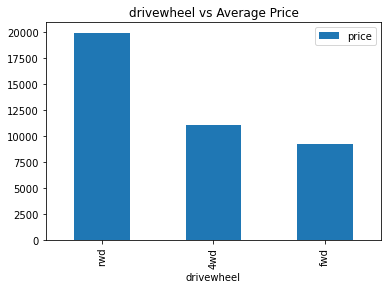

In [186]:
visualize('drivewheel','price')

#inference :
fwd and rwd drive wheel is mostly used and price for fwd wheel is moderately low

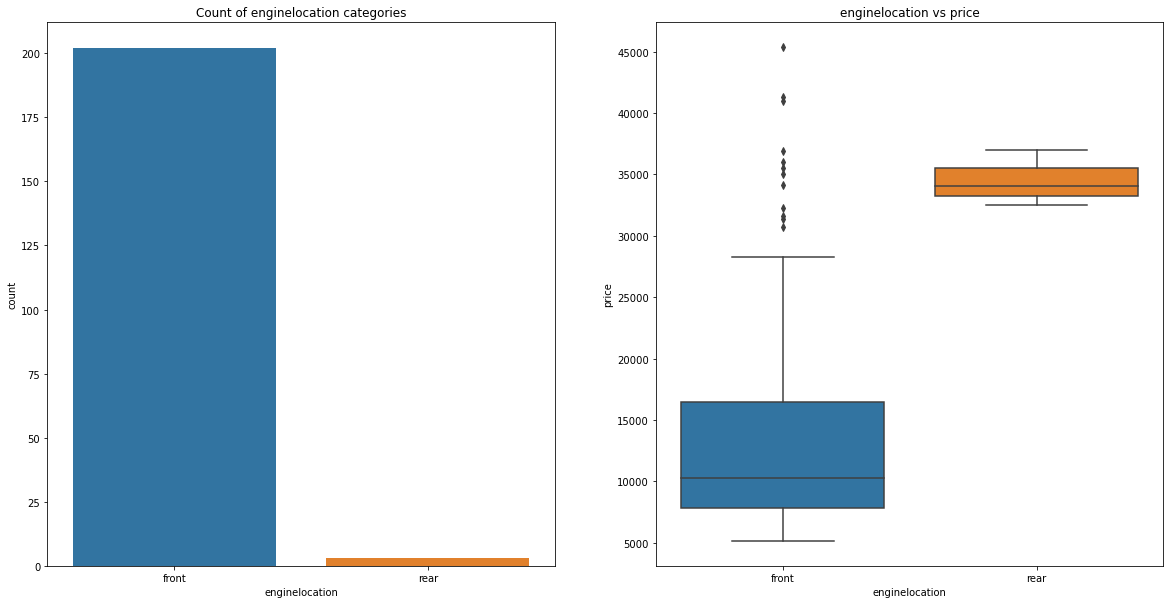

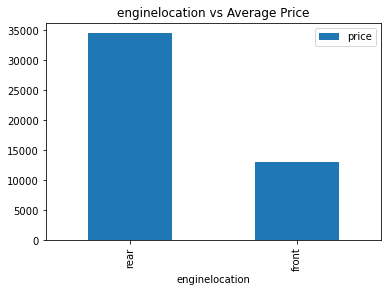

In [187]:
visualize('enginelocation','price')

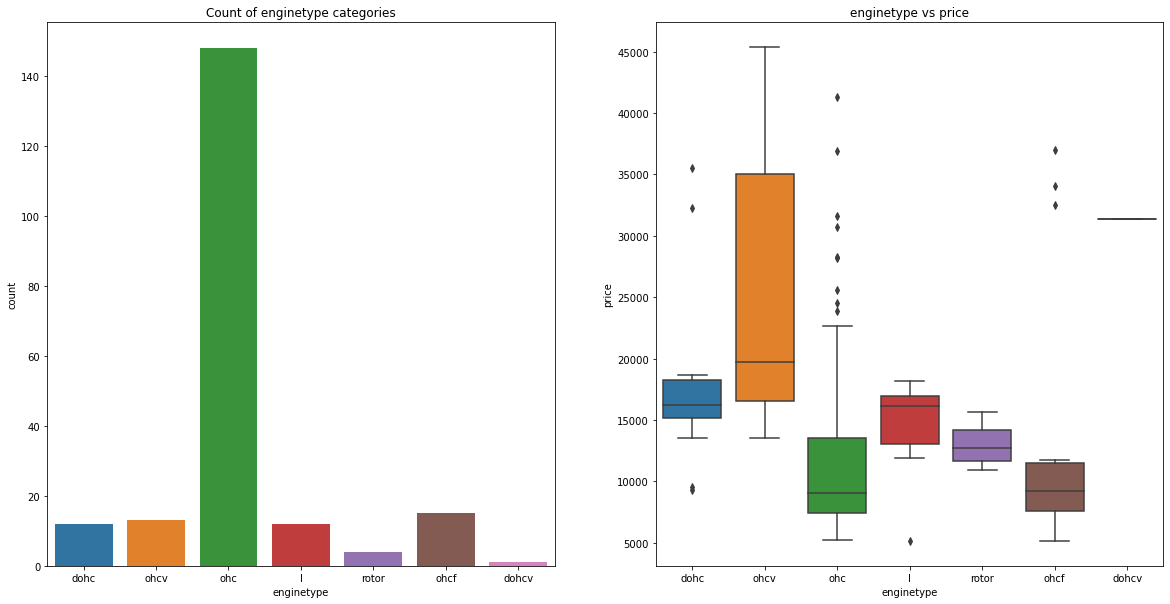

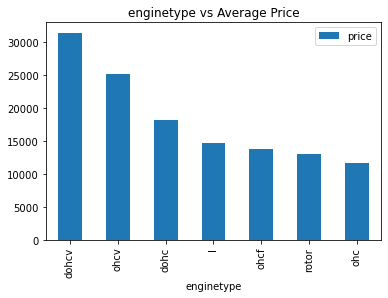

In [188]:
visualize('enginetype','price')


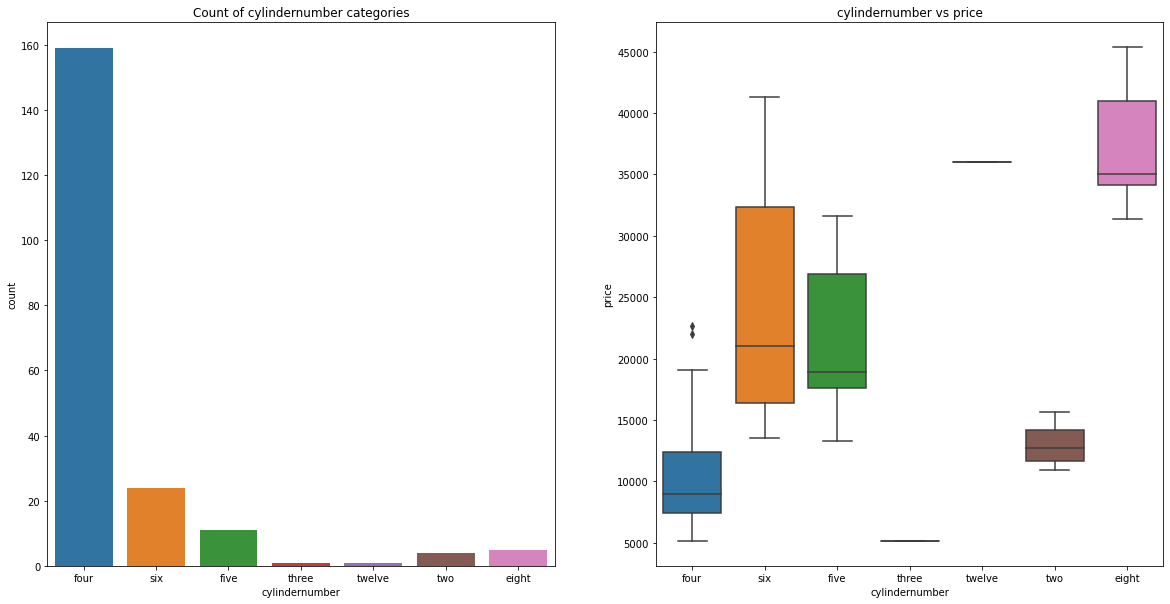

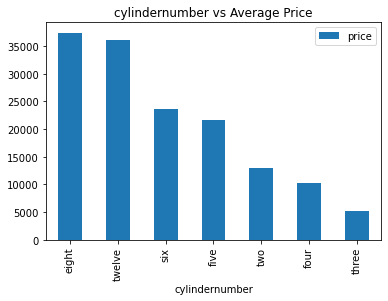

In [189]:
visualize('cylindernumber','price')


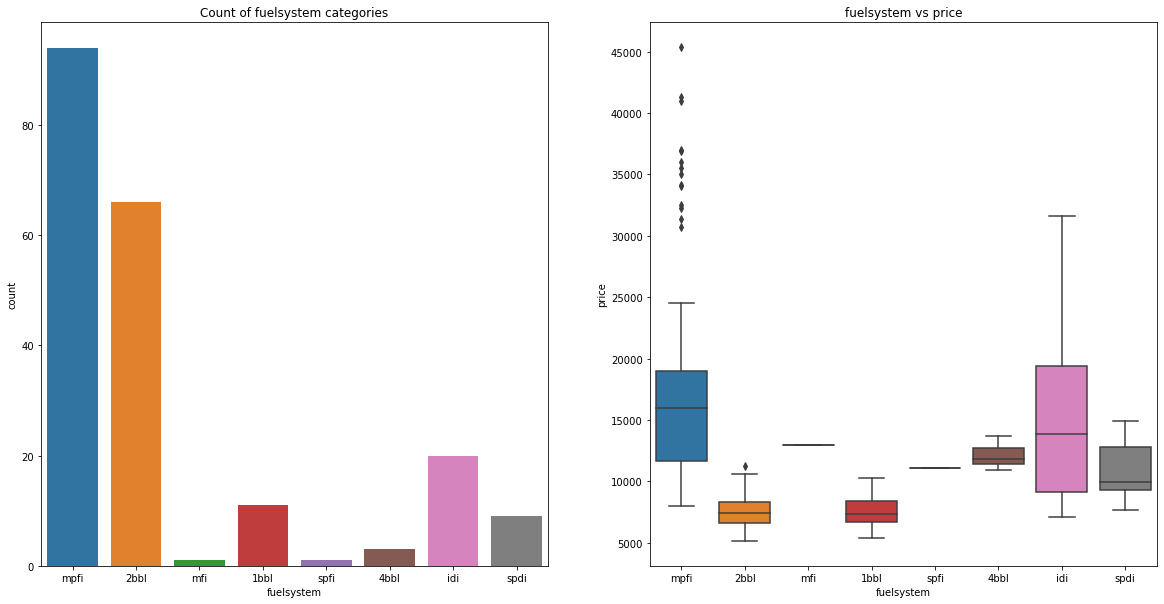

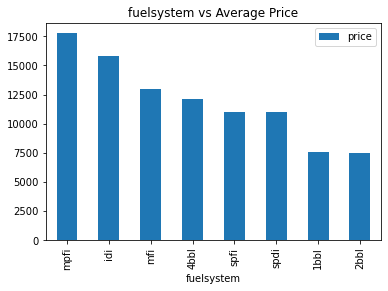

In [190]:
visualize('fuelsystem','price')

#Inference: 
1. front engine location is most used though it has highest price compared to rear
2. ohc cylinder is most used , but the price is moderate as compared to other cylinders
3. 4 cylinders are most used , but the price is moderate as compared to other cylindernumbers
4. mpfi fuelsystem is mostly used and the price is very low

[Text(0.5, 0, 'Car company'), Text(0, 0.5, 'Frequency of company')]

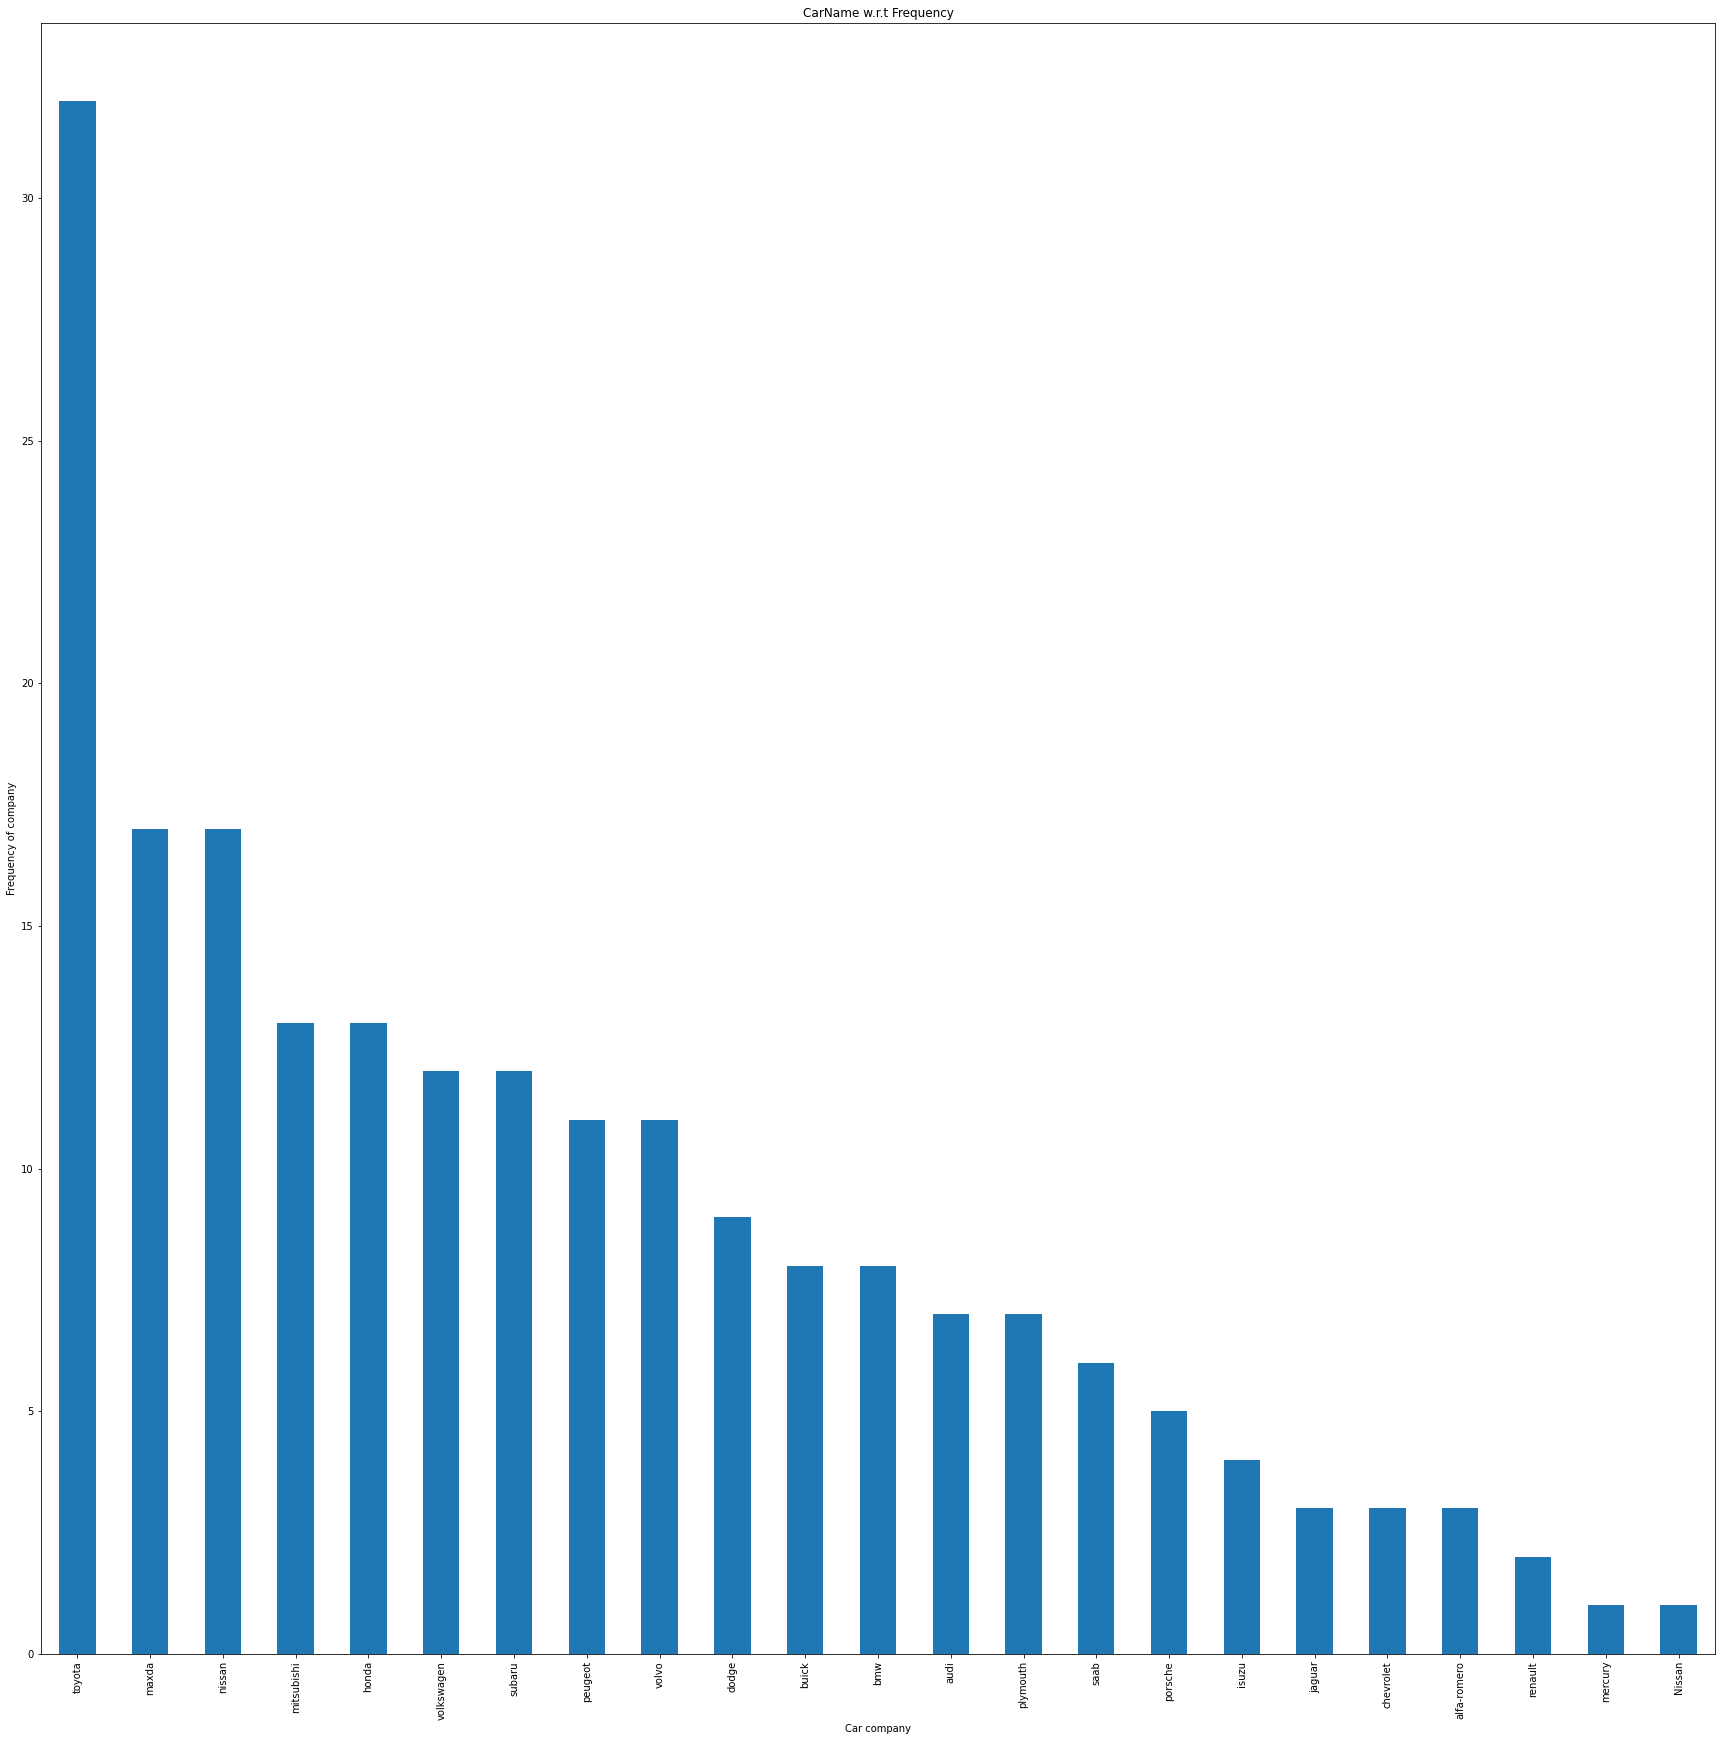

In [191]:
#visualize car name:

plt.figure(figsize=(30,30))

plt1=data['CarName'].value_counts().plot(kind='bar')
plt.title('CarName w.r.t Frequency')
plt1.set(xlabel = 'Car company', ylabel='Frequency of company')

#Inference: Toyota was most favored car among the others

In [192]:
#Visualizing numerical variables:
List=[]

for i in data.columns:
    if data[i].dtype!='object':
        List.append(i)

print(List)

['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']


In [193]:
# Displaying unique values for numerical features:

data['symboling'].value_counts()

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64

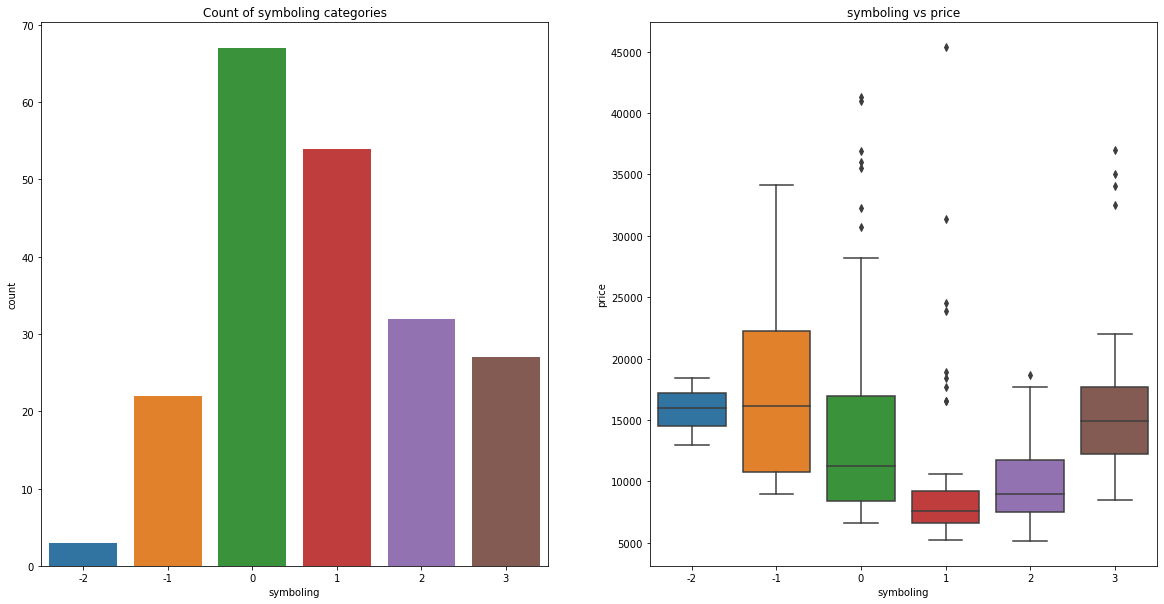

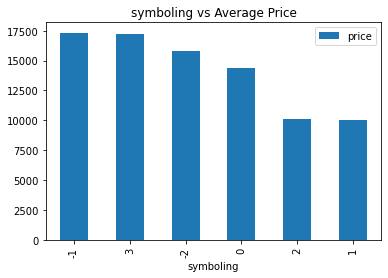

In [194]:
visualize('symboling','price')

In [195]:
def visualize_numerical(x,y,loc):
    
    plt.figure(figsize=(30,30))
    plt.subplot(8,2,2)
    sns.scatterplot(x=data[x],y=data[y])
    plt.title('scatter of {},{} categories'.format(x,y))
    
    plt.show()
    

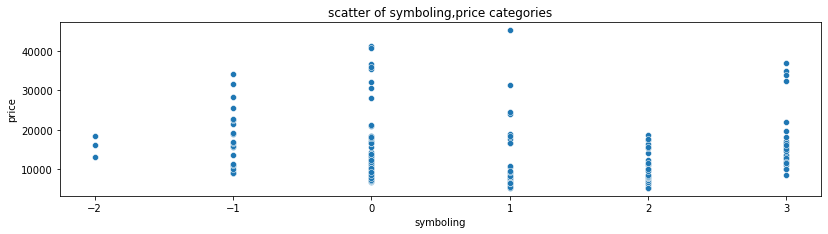

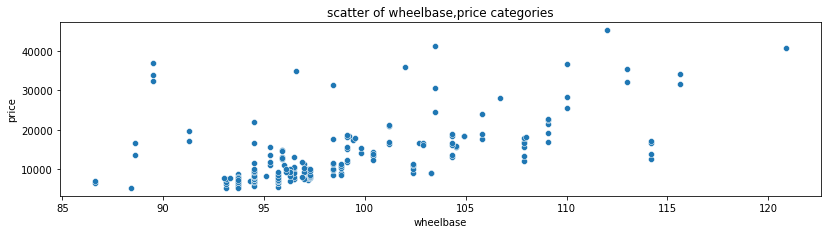

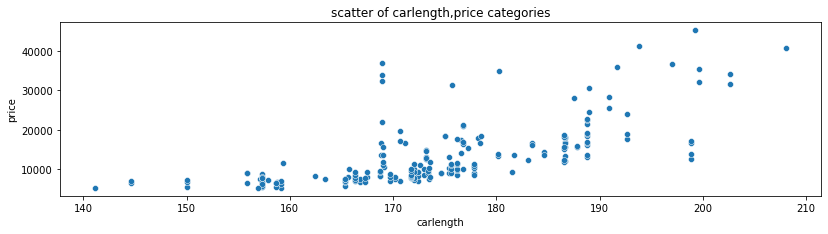

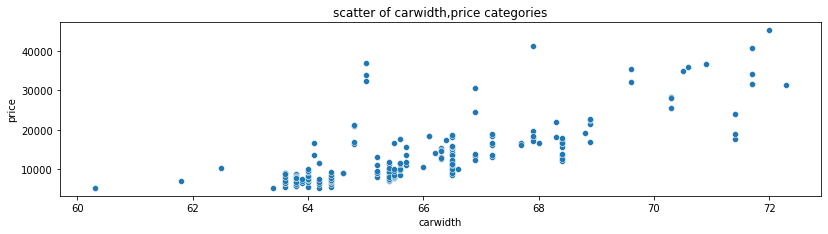

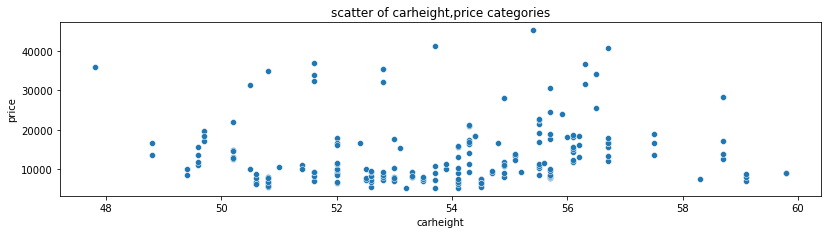

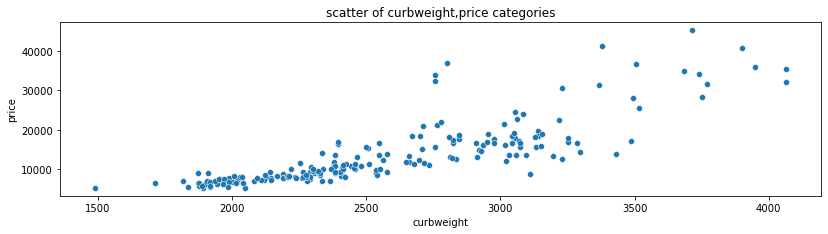

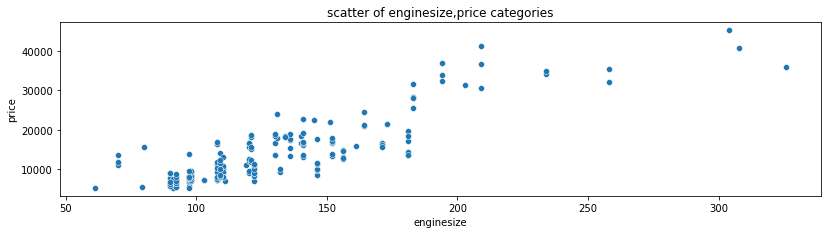

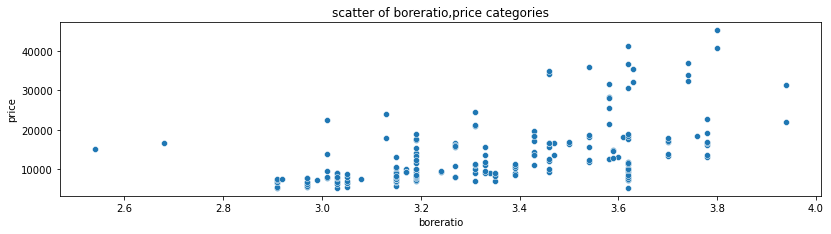

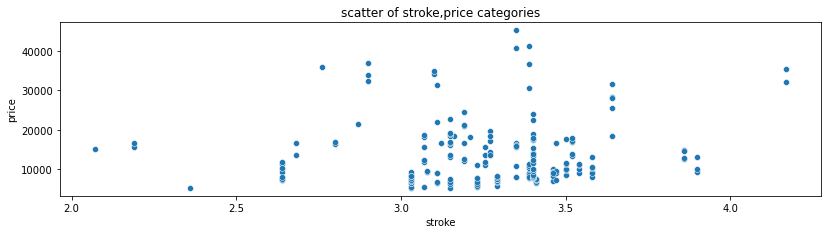

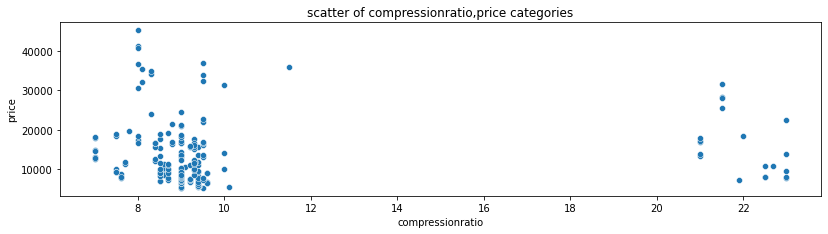

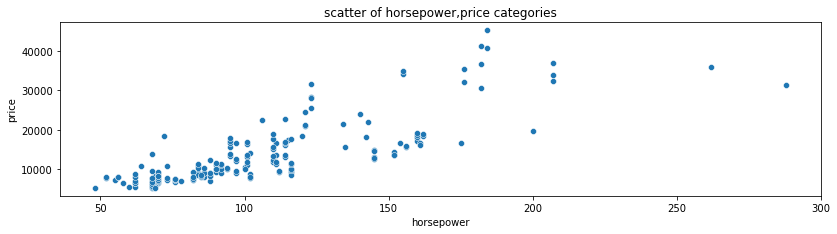

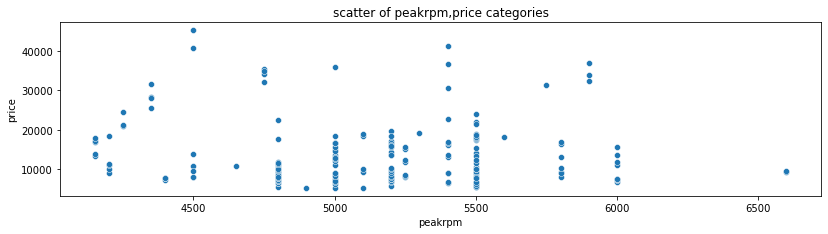

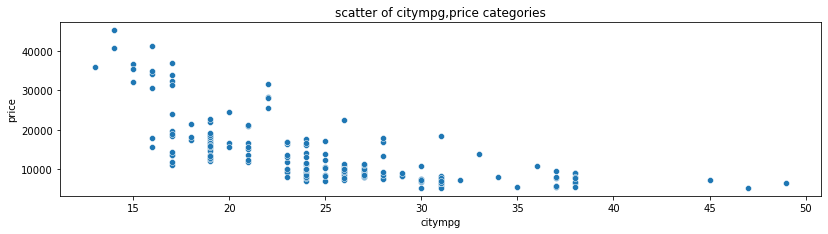

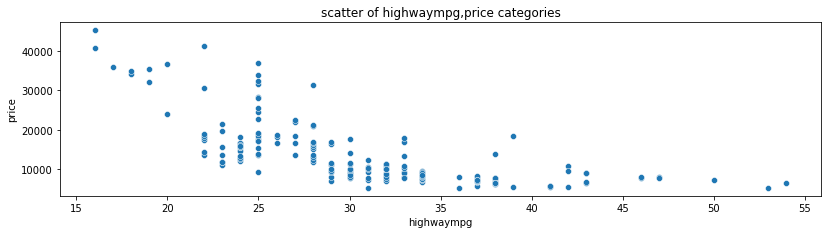

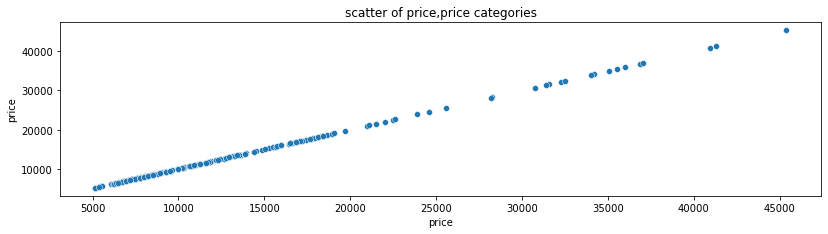

In [196]:
loc=0
for i in List:
    loc=loc+1
    visualize_numerical(i,'price',loc)

<AxesSubplot:>

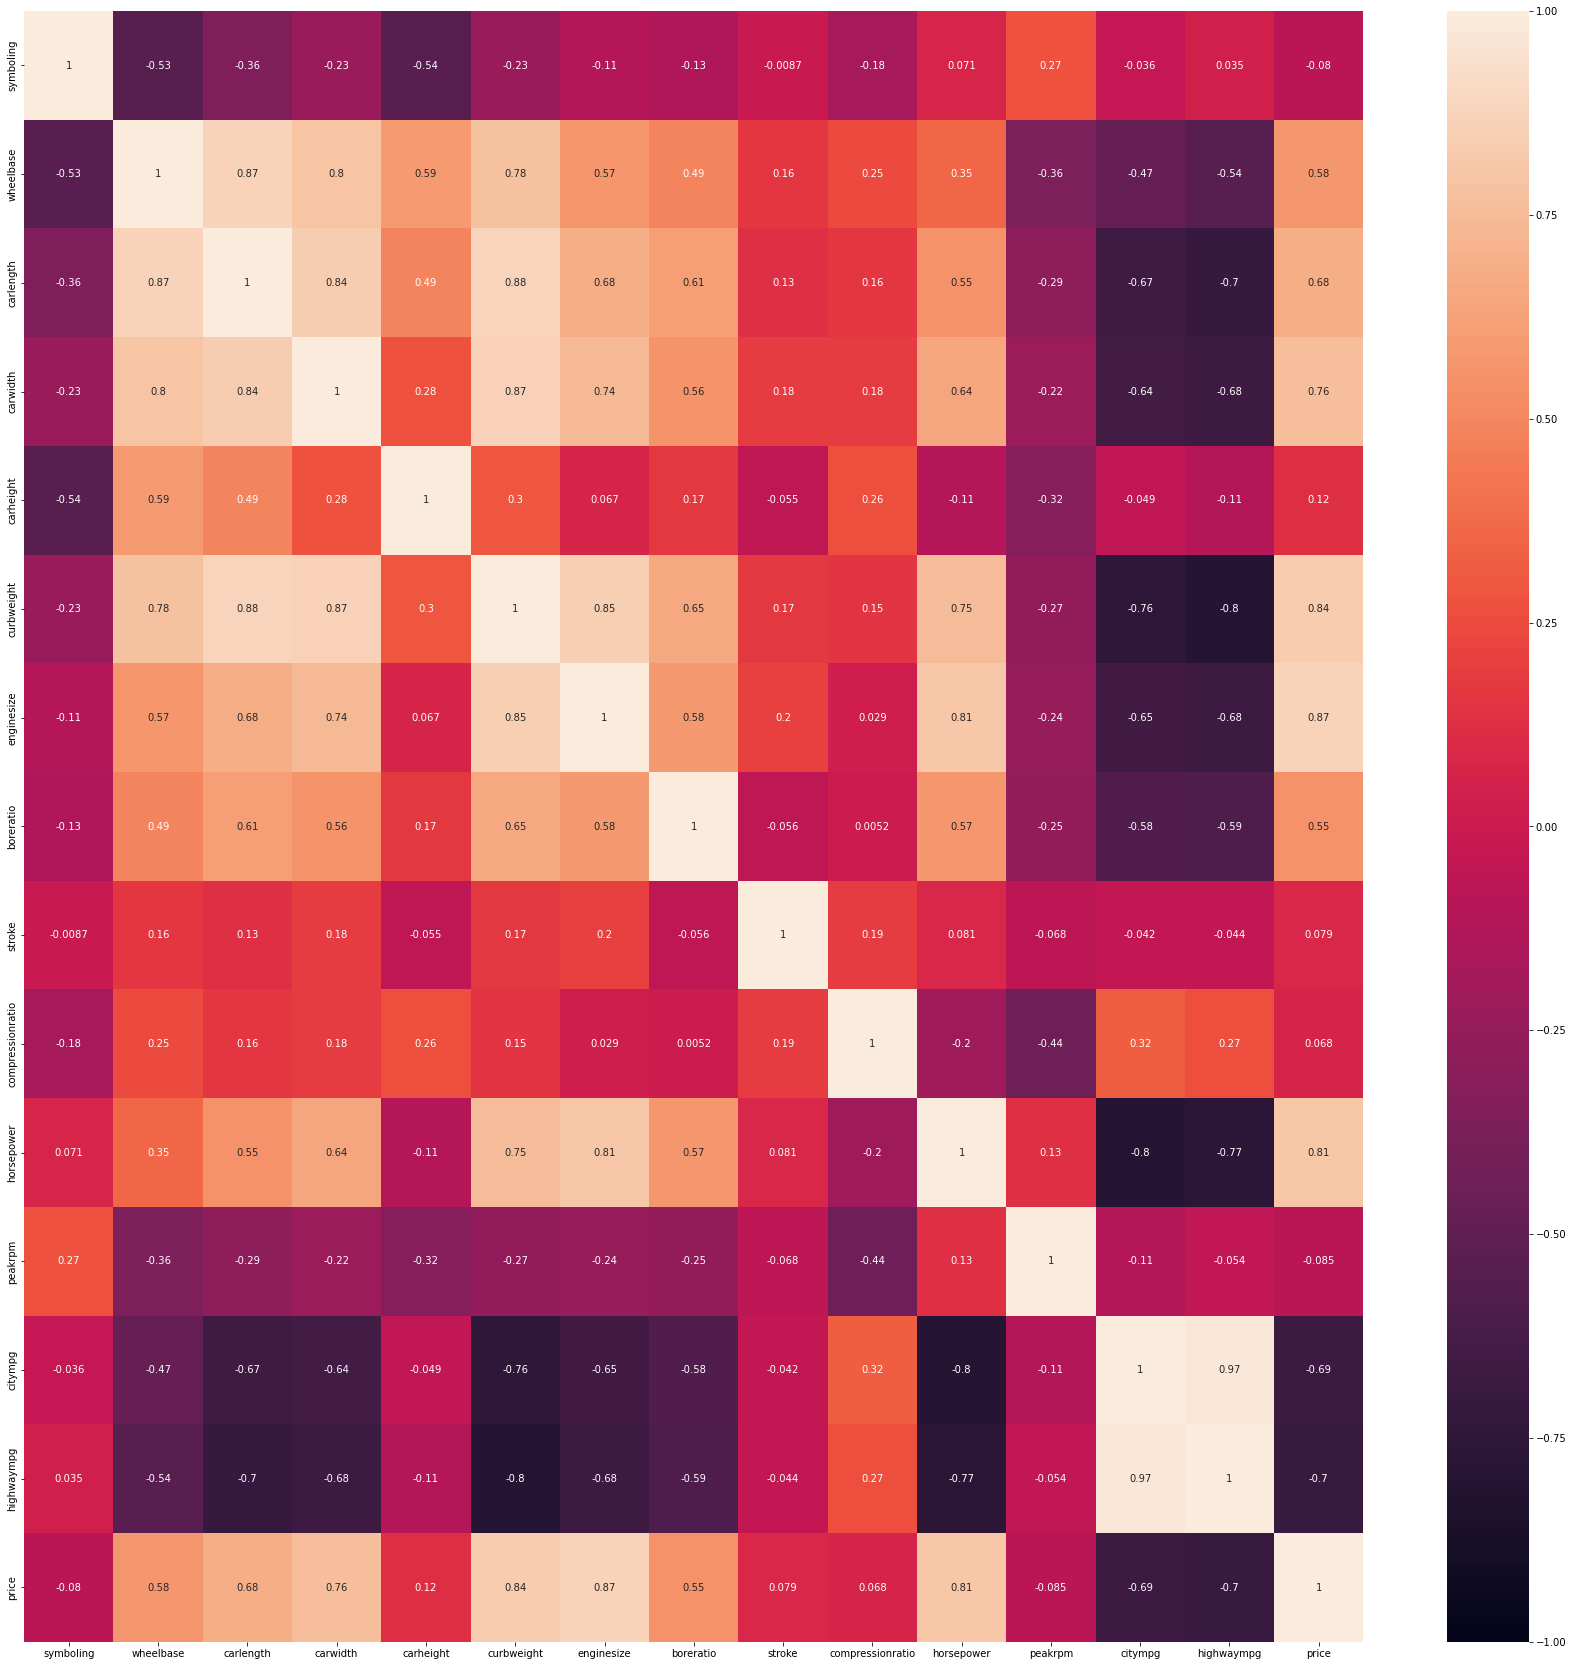

In [197]:
#To find the list the significant variables lets find their co-relation:

plt.figure(figsize=(30,30))
sns.heatmap(data.corr(),annot=True,vmin=-1,vmax=1)

#List of Significant variables

Wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg and highwaympg

In [198]:
#Deriving new features called CarRange based on price of CarName:

data['price'] = data['price'].astype('int')
temp = data.copy()
table = temp.groupby(['CarName'])['price'].mean()
temp = temp.merge(table.reset_index(), how='left',on='CarName')
bins = [0,10000,20000,40000]
cars_bin=['Budget','Medium','Highend']
data['carsrange'] = pd.cut(temp['price_y'],bins,right=False,labels=cars_bin)
data.head()

,symboling,fueltype,aspiration,CarName,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,carsrange
0,3,gas,std,alfa-romero,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495,Medium
1,3,gas,std,alfa-romero,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500,Medium
2,1,gas,std,alfa-romero,two,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500,Medium
3,2,gas,std,audi,four,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950,Medium
4,2,gas,std,audi,four,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450,Medium


<Figure size 2880x2160 with 0 Axes>

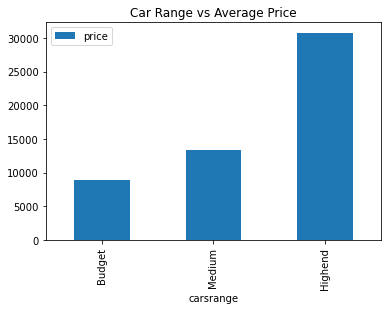

In [199]:
#Bivariate Analysis

plt.figure(figsize=(40,30))

df=pd.DataFrame(data.groupby(['carsrange'])['price'].mean())
df.plot(kind='bar')
plt.title("Car Range vs Average Price")
plt.show()

In [200]:
List_obj

['fueltype',
 'aspiration',
 'CarName',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem']

In [201]:
data['carsrange']=data['carsrange'].replace({"Budget":"0","Medium":"1","Highend":"2"})
data['carsrange']=data['carsrange'].astype('int')

In [202]:
data.head()

,symboling,fueltype,aspiration,CarName,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,carsrange
0,3,gas,std,alfa-romero,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495,1
1,3,gas,std,alfa-romero,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500,1
2,1,gas,std,alfa-romero,two,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500,1
3,2,gas,std,audi,four,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950,1
4,2,gas,std,audi,four,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450,1


In [203]:
for i in List_obj:
    temp_dummies=pd.get_dummies(data[i],drop_first=False)
    data=pd.concat([data,temp_dummies],axis=1)
data.head(2) 



,symboling,fueltype,aspiration,CarName,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,twelve,two,1bbl,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
0,3,gas,std,alfa-romero,two,convertible,rwd,front,88.6,168.8,...,0,0,0,0,0,0,0,1,0,0
1,3,gas,std,alfa-romero,two,convertible,rwd,front,88.6,168.8,...,0,0,0,0,0,0,0,1,0,0


In [204]:
data.drop(columns=['fueltype',
 'aspiration',
 'CarName',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem'],axis=1,inplace=True)

In [205]:
data.head(2)

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,twelve,two,1bbl,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,1,0,0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,1,0,0


In [206]:
X=data.copy()
X.drop(columns='price',axis=1,inplace=True)
Y=data['price']

In [207]:
X

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,twelve,two,1bbl,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,1,0,0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,1,0,0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,...,0,0,0,0,0,0,0,1,0,0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,...,0,0,0,0,0,0,0,1,0,0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,...,0,0,0,0,0,0,0,1,0,0
201,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,...,0,0,0,0,0,0,0,1,0,0
202,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,...,0,0,0,0,0,0,0,1,0,0
203,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,...,0,0,0,0,0,1,0,0,0,0


In [208]:
Y

0      13495
1      16500
2      16500
3      13950
4      17450
       ...  
200    16845
201    19045
202    21485
203    22470
204    22625
Name: price, Length: 205, dtype: int32

In [209]:
#Standarization

from sklearn.preprocessing import StandardScaler

ss=StandardScaler()

X_scaled=ss.fit_transform(X)

In [210]:
from sklearn.decomposition import PCA

pca=PCA(0.95)

X_pca=pca.fit_transform(X_scaled)

In [211]:
X_pca.shape

(205, 36)

In [212]:
pca.explained_variance_ratio_

array([0.15102166, 0.09283243, 0.05656473, 0.04922569, 0.04493437,
       0.0412143 , 0.03454686, 0.03244752, 0.0286569 , 0.02724599,
       0.02615907, 0.02571695, 0.0234381 , 0.02184977, 0.02071562,
       0.0199462 , 0.01972588, 0.01891664, 0.01764745, 0.01744338,
       0.0166556 , 0.01641166, 0.01496543, 0.01401073, 0.01360605,
       0.01316567, 0.01279087, 0.01139993, 0.01128545, 0.01051724,
       0.00959397, 0.00852731, 0.0077868 , 0.00730563, 0.00654524,
       0.00633679])

In [213]:
# original_num_df the original numeric dataframe
# pca is the model
def create_importance_dataframe(pca, data):

    # Change pcs components ndarray to a dataframe
    importance_df  = pd.DataFrame(pca.components_)

    # Assign columns
    importance_df.columns  = data.columns

    # Change to absolute values
    importance_df =importance_df.apply(np.abs)

    # Transpose
    importance_df=importance_df.transpose()

    # Change column names again

    ## First get number of pcs
    num_pcs = importance_df.shape[1]

    ## Generate the new column names
    new_columns = [f'PC{i}' for i in range(1, num_pcs + 1)]

    ## Now rename
    importance_df.columns  =new_columns

    # Return importance df
    return importance_df

# Call function to create importance df
importance_df  =create_importance_dataframe(pca, X)

# Show first few rows
display(importance_df.head())

# Sort depending on PC of interest

## PC1 top 10 important features
pc1_top_features = importance_df['PC1'].sort_values(ascending = False)[:36]
print(), print(f'PC1 top  feautres are \n')
display(pc1_top_features )


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36
symboling,0.070041,0.210750,0.222866,0.050797,0.035305,0.048857,0.013467,0.009469,0.063435,0.161905,...,0.016478,0.104242,0.031510,0.038653,0.039412,0.080370,0.110091,0.135693,0.064398,0.094465
wheelbase,0.229709,0.157082,0.061321,0.102611,0.066628,0.013632,0.025679,0.029042,0.060101,0.070756,...,0.023734,0.011866,0.112459,0.158081,0.025262,0.047912,0.032405,0.017278,0.048845,0.018443
carlength,0.259695,0.082121,0.070387,0.088969,0.037905,0.019367,0.018781,0.022714,0.038327,0.000691,...,0.020882,0.027074,0.038948,0.012001,0.089507,0.001932,0.060304,0.036145,0.003878,0.021821
carwidth,0.255959,0.041948,0.036396,0.102156,0.006992,0.018070,0.035545,0.088000,0.103316,0.027974,...,0.053554,0.006545,0.133987,0.071362,0.067526,0.010630,0.020816,0.010614,0.042447,0.030014
carheight,0.093075,0.224117,0.182512,0.025734,0.051828,0.039035,0.087558,0.067336,0.110876,0.027970,...,0.188049,0.036605,0.037345,0.078856,0.111581,0.000207,0.016725,0.070163,0.002693,0.039942



PC1 top  feautres are 



curbweight    0.283383
carlength     0.259695
carwidth      0.255959
enginesize    0.249235
highwaympg    0.238317
wheelbase     0.229709
horsepower    0.228986
citympg       0.228594
rwd           0.214872
fwd           0.209933
carsrange     0.207569
boreratio     0.203031
four          0.184058
2bbl          0.178588
mpfi          0.178475
ohc           0.137374
buick         0.130405
six           0.129441
ohcv          0.118926
hatchback     0.109768
eight         0.107673
carheight     0.093075
peugeot       0.089265
turbo         0.085853
std           0.085853
jaguar        0.084179
honda         0.083079
1bbl          0.082940
five          0.079900
volvo         0.074615
l             0.073302
symboling     0.070041
peakrpm       0.067246
two           0.064089
four          0.064089
diesel        0.063342
Name: PC1, dtype: float64

In [214]:
X_pca.shape

(205, 36)

In [215]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(X_scaled,Y,test_size=0.2,random_state=0)
X_train_pca,X_test_pca,Y_train_pca,Y_test_pca=train_test_split(X_pca,Y,test_size=0.2,random_state=0)

In [216]:
X_train.shape

(164, 76)

In [217]:
X_train_pca.shape

(164, 36)

In [218]:
#Variance Inflation factor:

import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [219]:
from sklearn.tree import ExtraTreeRegressor

exr=ExtraTreeRegressor()

exr_=exr.fit(X_scaled,Y)

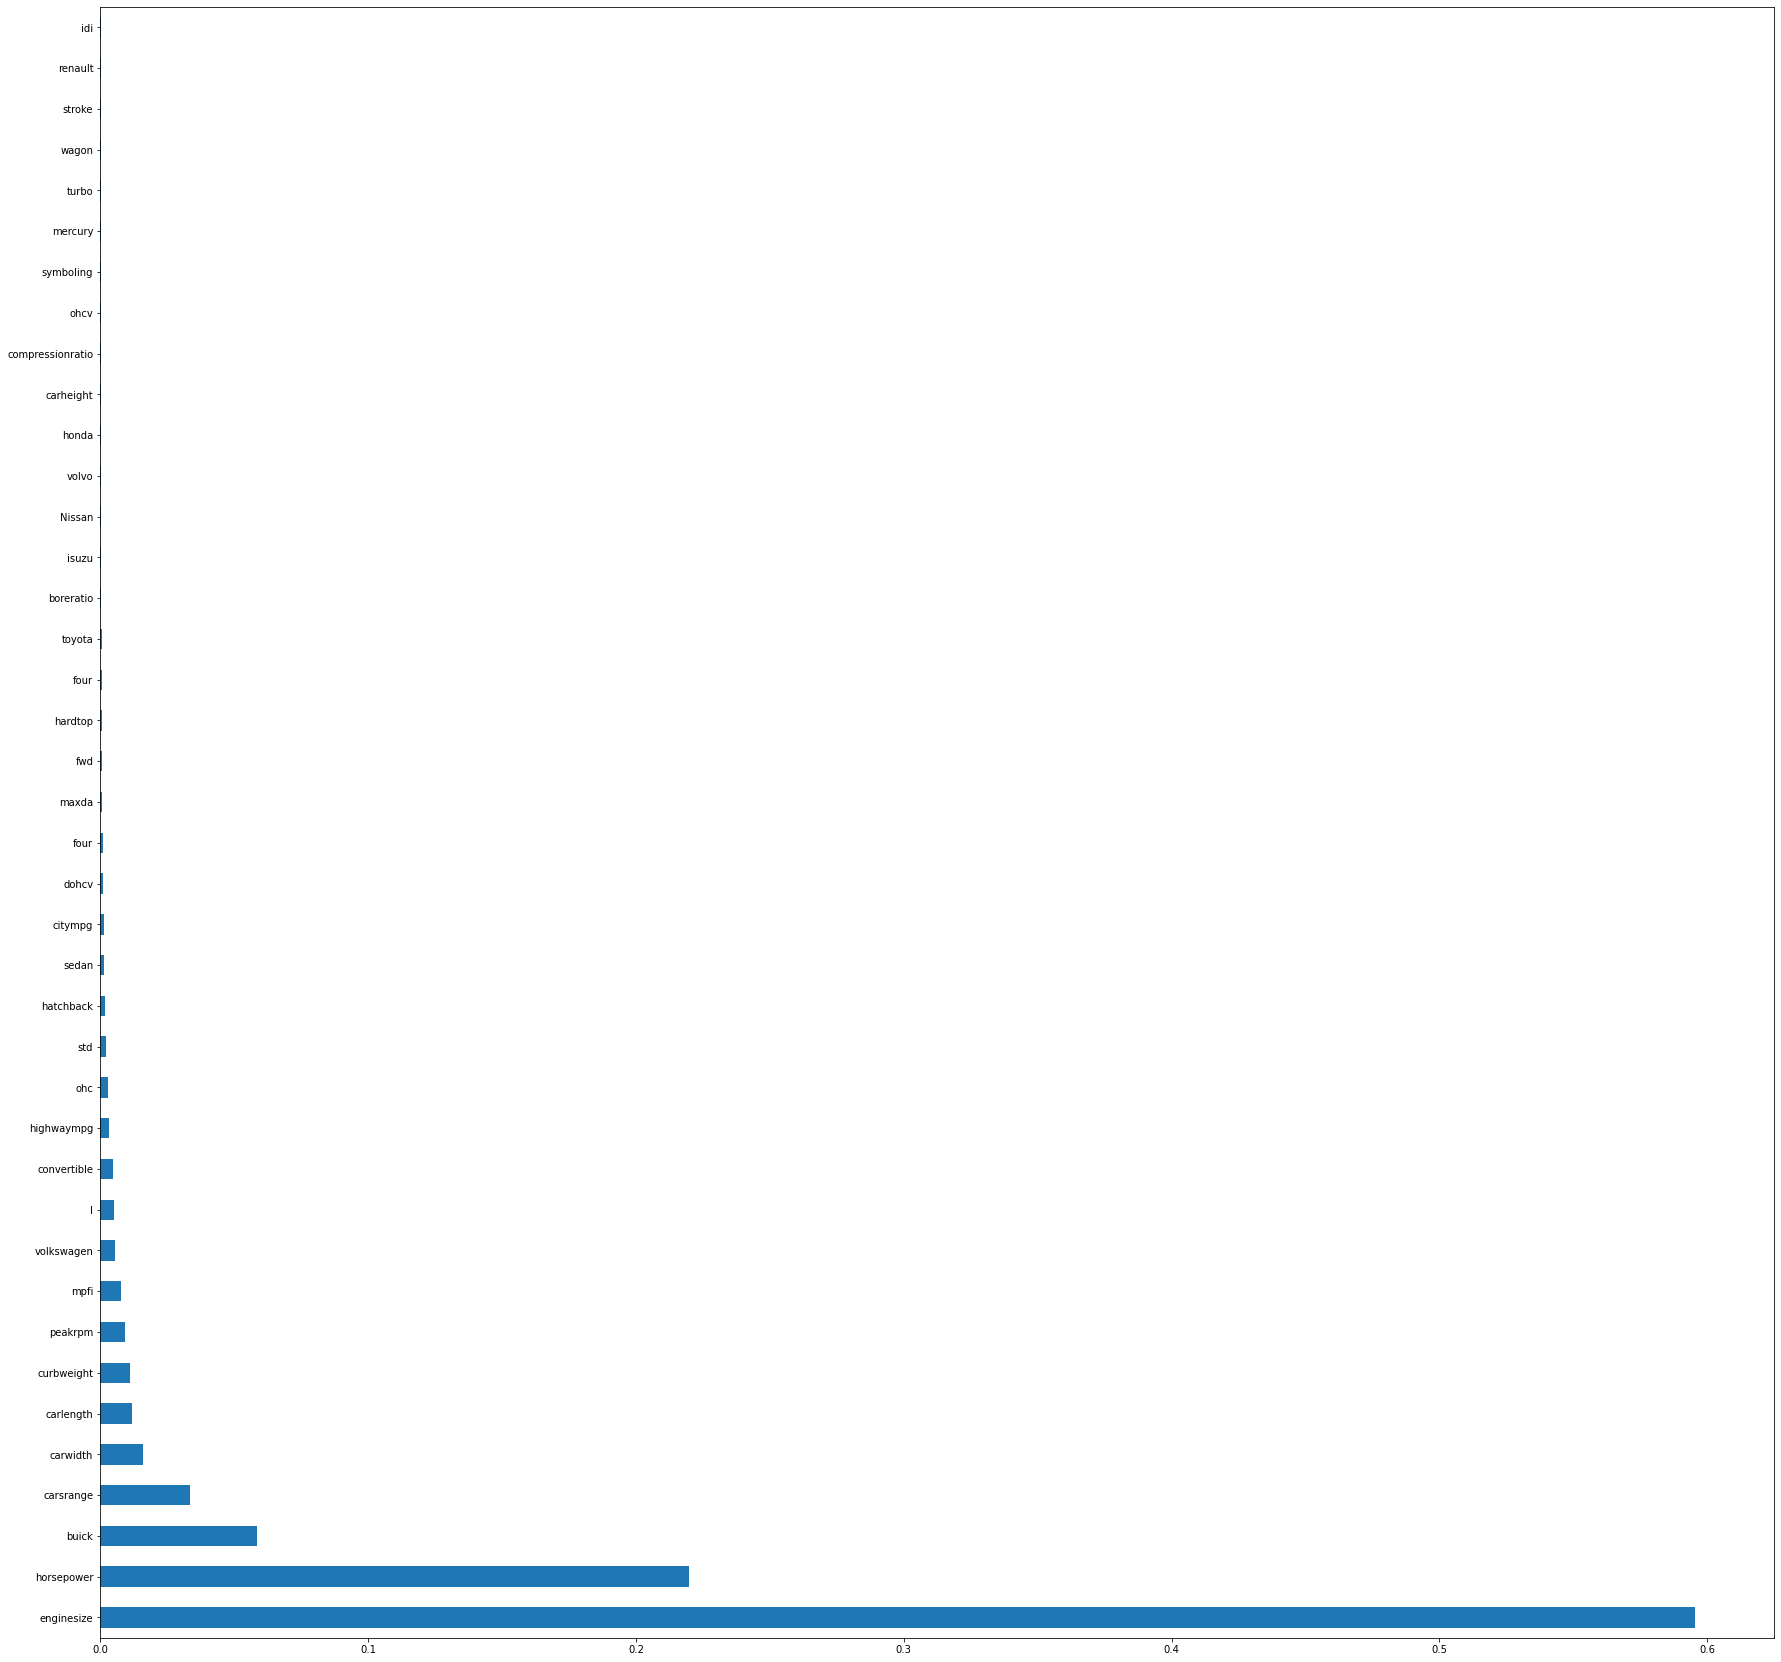

In [220]:
plt.figure(figsize=(30,30))
feature_imp=exr_.feature_importances_
df_feature=pd.Series(feature_imp,index=X.columns)
df_feature_high=df_feature.nlargest(40)

df_feature.nlargest(40).plot(kind='barh')
plt.show()



In [221]:
df_feature_high


enginesize          0.595323
horsepower          0.219800
buick               0.058510
carsrange           0.033336
carwidth            0.015898
carlength           0.011746
curbweight          0.011035
peakrpm             0.009373
mpfi                0.007899
volkswagen          0.005341
l                   0.005170
convertible         0.004790
highwaympg          0.003146
ohc                 0.002727
std                 0.002227
hatchback           0.001590
sedan               0.001402
citympg             0.001204
dohcv               0.000940
four                0.000925
maxda               0.000777
fwd                 0.000711
hardtop             0.000707
four                0.000492
toyota              0.000492
boreratio           0.000415
isuzu               0.000411
Nissan              0.000364
volvo               0.000357
honda               0.000357
carheight           0.000355
compressionratio    0.000342
ohcv                0.000313
symboling           0.000312
mercury       

In [222]:
exr_.feature_importances_

array([3.12324377e-04, 5.09009493e-05, 1.17463596e-02, 1.58980723e-02,
       3.55110433e-04, 1.10346937e-02, 5.95323260e-01, 4.15390896e-04,
       1.65154291e-04, 3.41875614e-04, 2.19800399e-01, 9.37273582e-03,
       1.20417779e-03, 3.14604827e-03, 3.33358724e-02, 0.00000000e+00,
       0.00000000e+00, 2.22665186e-03, 2.19626816e-04, 3.63741472e-04,
       0.00000000e+00, 0.00000000e+00, 3.05932260e-05, 5.85097032e-02,
       4.05622095e-05, 5.03043748e-06, 3.57062054e-04, 4.11400118e-04,
       4.13489970e-06, 7.76980946e-04, 2.63160304e-04, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.96562943e-05, 0.00000000e+00,
       1.14618817e-04, 0.00000000e+00, 0.00000000e+00, 4.92156854e-04,
       5.34093885e-03, 3.57432294e-04, 9.25096406e-04, 2.22054254e-05,
       4.78967607e-03, 7.07007881e-04, 1.59036649e-03, 1.40209067e-03,
       1.78305094e-04, 1.16309434e-05, 7.11167063e-04, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 9.40467678e-04,
      

In [223]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso,Ridge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score,mean_squared_error

In [224]:
training_score=[]
testing_score=[]
score=[]

def model(model,xtrain,ytrain,xtest,ytest):
    
    model.fit(xtrain,ytrain)
    
    y_train_pred=model.predict(xtrain)
    train_r2_score=r2_score(ytrain,y_train_pred)
    training_score.append(train_r2_score)
    
    y_test_pred=model.predict(xtest)
    test_r2_score=r2_score(ytest,y_test_pred)
    testing_score.append(test_r2_score)
    
    cross_val=cross_val_score(model,xtrain,ytrain,cv=5)
    crossval_mean=cross_val.mean()
    score.append(crossval_mean)
    
    

In [225]:
lr=LinearRegression()
dtr=DecisionTreeRegressor()
ls=Lasso()
rg=Ridge()

model_dict={lr:LinearRegression(),dtr:DecisionTreeRegressor(),ls:Lasso(),rg:Ridge()}

for key,value in model_dict.items():
    model(key,X_train_pca,Y_train_pca,X_test_pca,Y_test_pca)

print(training_score,testing_score,score)

[0.9610537322789202, 0.9984642632061447, 0.961031528261188, 0.9605171743016863] [-1.2417345883357571, 0.8939436010944126, -1.023060313919573, -0.2569032315658577] [0.22933098686525827, 0.8139783356976048, 0.3554023266806764, 0.8057058651969831]


In [226]:
gbr=GradientBoostingRegressor()
rfr=RandomForestRegressor()



#Hyperparametre tuning for Randomforest
n_estimators=list(range(100,200,500))

min_samples_split=list(range(3,6,9))

max_depth=list(range(5,10,15))

min_samples_leaf=[1,3,5,7]

max_features=['auto','sqrt']

param_distributions={"n_estimators":n_estimators,
                    "min_samples_split":min_samples_split,
                    "max_depth":max_depth,
                    "min_samples_leaf":min_samples_leaf,
                    "max_features":max_features}

rzc=RandomizedSearchCV(estimator=rfr,param_distributions=param_distributions)



In [227]:
#Hyperparametre tuning for GradientBoosting
learning_rate=[0.0001,0.001,0.1]

n_estimators=list(range(100,200,500))

min_samples_split=list(range(3,6,9))

max_depth=list(range(5,10,15))

min_samples_leaf=[1,3,5,7]

max_features=['auto','sqrt']

param_distributions={"learning_rate":learning_rate,
                    "n_estimators":n_estimators,
                    "min_samples_split":min_samples_split,
                    "max_depth":max_depth,
                    "min_samples_leaf":min_samples_leaf,
                    "max_features":max_features}

gb_rc=RandomizedSearchCV(estimator=gbr,param_distributions=param_distributions)




In [228]:
tree_dict={gb_rc:GradientBoostingRegressor,rzc:RandomForestRegressor}

for key,value in tree_dict.items():
    model(key,X_train_pca,Y_train_pca,X_test_pca,Y_test_pca)
    
print(training_score,testing_score,score)

C:\Users\a0g0btd\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\a0g0btd\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\a0g0btd\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\a0g0btd\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\a0g0btd\Anaconda3\lib\site-packages

[0.9610537322789202, 0.9984642632061447, 0.961031528261188, 0.9605171743016863, 0.9978064634670697, 0.9812497298060424] [-1.2417345883357571, 0.8939436010944126, -1.023060313919573, -0.2569032315658577, 0.9036899739382134, 0.8855865344185996] [0.22933098686525827, 0.8139783356976048, 0.3554023266806764, 0.8057058651969831, 0.8928097176389015, 0.8841369283507294]


In [229]:
Scores=pd.DataFrame([training_score,testing_score,score],index=['training_score','testing_score','score'],columns=['LR','DT','LS','RD','GBR','RFR'])

In [230]:
Scores

,LR,DT,LS,RD,GBR,RFR
training_score,0.961054,0.998464,0.961032,0.960517,0.997806,0.981250
testing_score,-1.241735,0.893944,-1.023060,-0.256903,0.903690,0.885587
score,0.229331,0.813978,0.355402,0.805706,0.892810,0.884137


In [231]:
import pickle

file=open('Gradient_boosting.pkl','wb')
pickle.dump(gb_rc,file)

In [232]:
pickle_in=open("Gradient_boosting.pkl",'rb')
best_model=pickle.load(pickle_in)

In [233]:
X_train_pca[0]

array([ 1.98768961,  0.35855745, -1.48561695, -1.79414013,  0.07242028,
        0.10983785,  4.34147167,  2.56194799,  0.55888929,  4.09149514,
       -0.50026761,  2.27517155,  2.47687301,  1.37996713,  1.04992385,
        1.46475208, -0.33583577, -0.09598846, -0.6765529 ,  1.18204287,
        1.28625576, -0.67762899, -1.06584704,  0.23986151, -0.35536883,
        0.04374947, -0.35619177,  0.38731033,  0.39723398,  1.57754704,
       -1.23228136, -0.36285735,  1.55564326, -1.86250492,  0.45607909,
        0.23977183])

In [234]:
Y_train_pca[0]

13495

In [235]:
best_model.predict([[1.98768961,  0.35855745, -1.48561695, -1.79414013,  0.07242028,
        0.10983785,  4.34147167,  2.56194799,  0.55888929,  4.09149514,
       -0.50026761,  2.27517155,  2.47687301,  1.37996713,  1.04992385,
        1.46475208, -0.33583577, -0.09598846, -0.6765529 ,  1.18204287,
        1.28625576, -0.67762899, -1.06584704,  0.23986151, -0.35536883,
        0.04374947, -0.35619177,  0.38731033,  0.39723398,  1.57754704,
       -1.23228136, -0.36285735,  1.55564326, -1.86250492,  0.45607909,
        0.23977183]])

array([17482.12231179])